In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

warnings.simplefilter('ignore') # So that we can ignore depreciation issues in Python.
df = pd.read_csv('cluster1.csv',names=["x", "y"])
df.head()

,x,y
0,2.7759,-1.47160
1,6.1090,0.99685
2,3.2623,-1.30980
3,2.2895,-0.43370
4,2.2404,-4.09190


In [2]:
colmap = {1: 'r', 2: 'g', 3: 'b'} # Initialising the colors as a dictionary
kmeans = KMeans(n_clusters = 3)# Initialising cluster count to 3 as mentioned in the problem statement
kmeans.fit(df)# fitting the data

KMeans(n_clusters=3)

In [3]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_ #Centroid location

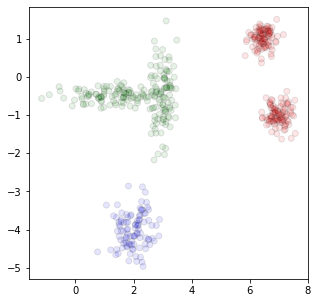

In [4]:
fig = plt.figure(figsize = (5, 5))
colors = map(lambda x: colmap[x +  1], labels) #mapping the colors into array
print(colors)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.1, edgecolor='k')

In [9]:
def random_seeding(seed_count, data, color_map, axis):
    kmeans = KMeans(n_clusters = 3, n_init = seed_count+1)# Initialising cluster count to 3 as mentioned in the problem statement
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_ #Centroid location
    colors = map(lambda x: color_map[x + 1], labels) #mapping the colors into array
    for idx,centroid in enumerate(centroids):
        axis[seed_count].scatter(*centroid, color=color_map[idx+1])
    colors1 = list(colors)
    axis[seed_count].scatter(data['x'], data['y'], color=colors1, alpha=0.1, edgecolor='k')

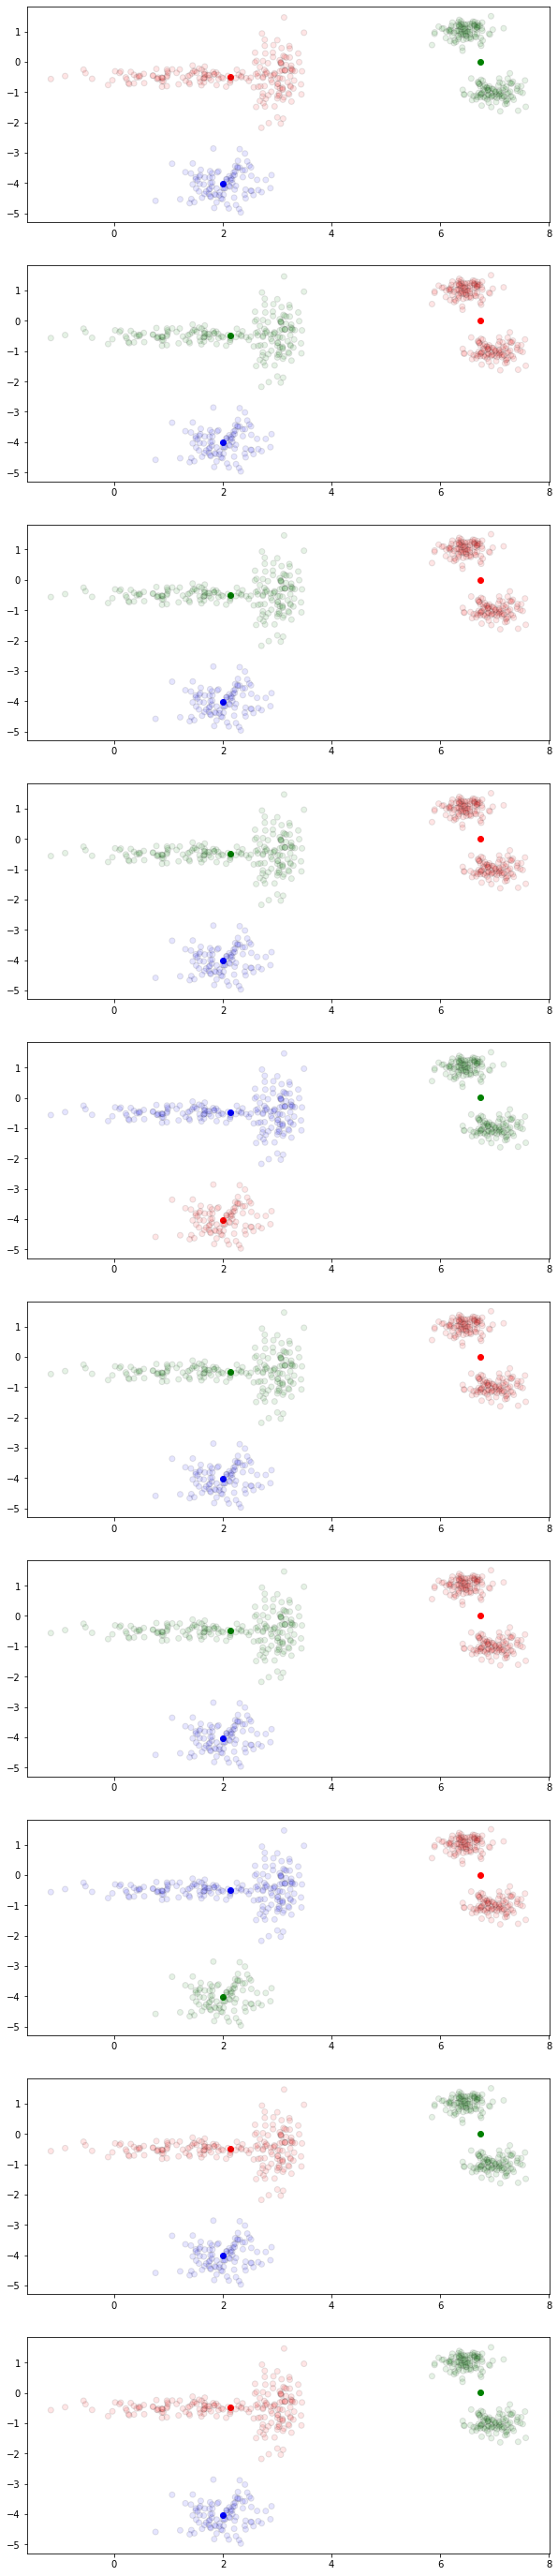

In [10]:
fig, ax = plt.subplots(10, figsize=(10, 50))
for i in range(0,10):
    random_seeding(i, df, colmap, ax)

# I do agree with my colleague for the statement where 3 cluster will only have these as the local centroids, when applying random seeders.
#### Reason 1: K-means is a local optimizer and it does not guarantee optimal parameter. So as per k-means function 
#### caliber this is the best result it can provide.
#### Reason 2: I have run k-means for multiple random seeders by setting random_state in the range 1 to 10 
#### and have plotted these along with their centroids highlighted. As observed the centroids remain the same eventhough
#### the initial centroid selected in each iteration is different.

In [ ]:
def clustering(cluster_count, data, color_map, axis):
    kmeans = KMeans(n_clusters = cluster_count+1)# Initialising cluster count to 3 as mentioned in the problem statement
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_ #Centroid location
    axis[cluster_count].scatter(data['x'], data['y'], color=vectorizer(labels), alpha=0.1, edgecolor='k')

In [ ]:
colmap = ['red', 'green', 'blue', 'yellow', 'black', 'violet']
vectorizer = np.vectorize(lambda x: colmap[x % len(colmap)])
fig, ax = plt.subplots(6, figsize=(10, 50))
for i in range(0,6):
    clustering(i, df, colmap, ax)

# But i do not agree with the statement that 3 clusters are best possible cluster count for the data set.
#### Cause as per the plots above. 5 clusters seem to be the best count based on the data set provided (visually basing on the plot)

In [11]:
from sklearn.mixture import GaussianMixture
def maximum_likelihood(cluster_count, data):
    gmm = GaussianMixture(n_components=cluster_count).fit(data)
    return(gmm.bic(data))

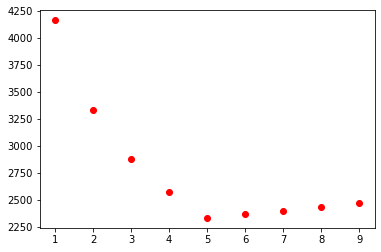

In [12]:
cluster_list = []
maximum_likelihood_list = []
for i in range(1,10): 
    maximum_likelihood_list.append(maximum_likelihood(i,df))
    cluster_list.append(i)
dataframe1 = pd.DataFrame([cluster_list, maximum_likelihood_list])
dataframe1 = dataframe1.transpose()
dataframe1.columns=['x','y']
dataframe1.head()
plt.scatter(dataframe1['x'], dataframe1['y'], c='r')

# Proof as to why 5 clusters are the best.
#### This can be observed based on Bayesian Information Criterion